# 需求

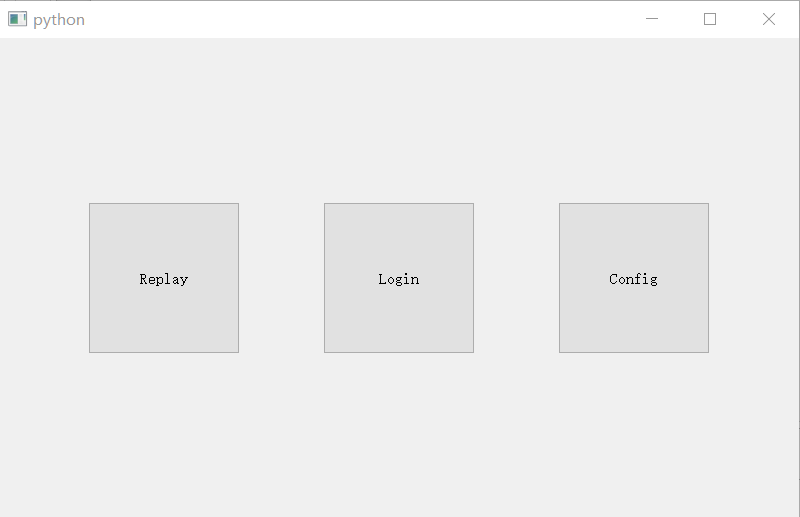

刚提交完开机界面，正想继续用户界面开发呢？接到客户需求的变换，原来客户觉得新设计的界面不错，他们还有其他不同的机型，屏幕大小各不相同，所以原来计划800x500的界面想要扩展到其他机型上去，结果就是需要做成自适应的。 

“你知道昨天的界面，可是我一点点计算出来的”我很不开心的说到

Leader：“我理解你的心情，但是客户的这次增加需求说明是对你工作的肯定，咱们面向的客户是不懂技术的，很多时候是需要去主动引导的，他们会根据我们做出来的东西提出各种新的想法，这是很正常的”

“可是照这样下去，谁知道明天会再冒出个什么想法呢”领导的这种解释我不能接受，客户的一点风吹草动，我半天的功夫就白费了...

Leader：“当然，如果一直改这个项目就做不完了。所以面对客户提出需求变化时，需要做分析的，不能全部答应，要给客户解释需求背后的风险与成本。不过这次客户所提的需求，我之前是有想到的，做软件开发需要在灵活性和复杂性上做均衡。我看过你的代码，三个按钮的大小和在屏幕上的位置都是在程序中写死的，并且是根据800x500的尺寸计算出来的，这样本身就存在很大的问题如果有一点点修改就会导致相互影响，例如客户觉得三个按钮的距离不合适。当然还有一个很重要的因素是这次需求的变更在项目开始的初期提出的，对项目影响不是很大，否则咱们也要评估下对项目进度的影响来商议是否接受的。”

“听起确实很有道理，我做的时候也觉得方法很笨拙。但是只想着先做出来了。”听了领导的话，感觉有一点后怕，要是等到项目后期，客户非要兼容不同屏幕，那我一个个的改还不累死...

Leader：“并且，我也了解过一点qt的东西，知道里面Layout相关功能。”

Leader：“你的布局属于绝对位置定位(absolute positioning), 更高级一点是手工布局(manual layout)，就是给出空间的绝对位置然后根据窗口大小变化重新计算并修改空间大小，还有使用布局管理器(layout managers)，也就是我说的Layout。当然多数时候使用的是后面两种共同使用，具体你去查一下就知道了”

# QLayout常用子类

[doc.qt.io/qt-5/layout](https://doc.qt.io/qt-5/layout.html)

Qt提供了很多Layout的子类，常用的有：QBoxLayout, QGridLayout, QFormLayout, QStackedLayout。
* QBoxLayout：箱式布局
    * QHBoxLayout：水平对齐布局
    * QVBoxLayout：垂直对齐对齐布局
* QGridLayout: 栅格对齐
* QFormLayout：表单布局
* QStackedLayout：栈布局，一个窗口在另一个窗口前面
* QGraphicsAnchorLayout：锚布局


## 用Layout布局按钮

Qt提供了三个位置布局类，`QBoxLayout`, `QGridLayout`, `QFormLayout`。另外还有一个`QStackedLayout`可以在同一个位置放置多个控件，可根据需要调整最顶端显示的控件。`QLayout`也可以在Qt Designer上使用，为了理解和展示`QLayout`是怎么工作的，此处选择用代码来实现。

需要的界面上有三个一字排开的按钮，并且按钮等间隔均匀排布，所以水平布局应该能满足需要，同时栅格布局也应该可以，就像把按钮放在九宫格里一样。不管选择哪种布局器，布局器都只是一个方法，需要使用这种方法的对象-控件，这里我们的控件是按钮，还需要展示布局效果的窗口，因为是嵌入式应用所以这里选择`QWidget`。

新建一个QWidget界面，界面暂时保留标题栏，保留默认背景色。标题栏需要隐藏是可通过`.setWindowFlags (Qt.FramelessWindowHint)`来实现。

In [2]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout
from PyQt5.QtCore import Qt

app = QApplication([])

widgetMain = QWidget()

widgetMain.resize(800,480) # 修改界面大小

不仅是团队开发还是个人开发，代码的规范性都很重要，上面的这段代码已经该过很多次，这次把对象的创建和对象的函数调用之间加了一个空行。
。代码的规范性主要是为了提高代码的质量、可读性和可维护性。

创建一个布局器吧

In [3]:
from PyQt5.QtWidgets import QHBoxLayout

layoutMain = QHBoxLayout()

只有布局器是不行的，里面需要添加布局对象才行。所以我们导入按钮并添加到布局器里。

In [4]:
from PyQt5.QtWidgets import QPushButton

layoutMain.addWidget(QPushButton("Replay"))
layoutMain.addWidget(QPushButton("LogIn"))
layoutMain.addWidget(QPushButton("Config"))

`.addWidget`函数完成了按钮的添加，按钮创建的同时使用了入口参数指定按钮的名字，这个名字会被显示在按钮上。按钮的添加顺序就是布局时的先后顺序。

展示的界面有了，布局器也有了，并且布局器中有3个按钮，且这三个按钮是水平排布的。下面就需要把布局器在界面上展示了。

In [ ]:
widgetMain.setLayout(layoutMain)
widgetMain.show()

app.exec_()

代码规范的完善`app.exec_()`也和前面的代码加了个空行，原因是前后代码的功能不同。

<img src=./image/qt_layout_3buttons_hbox.png width=500>

虽然按钮的排布顺序是对的。但是为什么按钮在水平方向上占满了界面？这要从布局器的工作方式来解释。布局器配置控件参数时是按照布局器可用窗口的大小根据控件数量均分空间，并且会根据拉伸系数进行拉伸使其占满布局空间，拉伸范围是控件的最大值、最小值。在这里我们可以设置最大值来避免按钮过度拉伸。

In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout
from PyQt5.QtCore import Qt

app = QApplication([])

widgetMain = QWidget()
layoutMain = QHBoxLayout()

# 定义三个按钮并配置最大尺寸
btnRelay = QPushButton("Replay")
btnRelay.setMaximumSize(100,100)
btnRelay.setMinimumSize(50,50)
btnLogin = QPushButton("Login")
btnLogin.setMaximumSize(100,100)
btnLogin.setMinimumSize(50,50)
btnConfig = QPushButton("Config")
btnConfig.setMaximumSize(100,100)   
btnConfig.setMinimumSize(80,80) 

# 把按钮添加到布局器中
layoutMain.addWidget(btnRelay)
layoutMain.addWidget(btnLogin)
layoutMain.addWidget(btnConfig)

# 配置主界面大小，给主界面添加布局器
widgetMain.resize(800,480) # 修改界面大小
widgetMain.setLayout(layoutMain)
widgetMain.show()

In [2]:
app.exec_()

0

设置过最大值、最小值后，随着窗口的变化，按钮也会变化。但是按钮是在窗口足够小的时候才变化的。这里有1个问题是按钮没有随界面等比例缩放。

等比例缩放其实就是拉伸。

## 缩放策略

需要说明的是默认按钮是不做垂直缩放的，就像最开始的三个按钮，只做了水平方向的拉伸。这是qt针对按钮做特殊策略。这个策略是控件随窗口变化时决定空间尺寸的。有5种不同模式：

|模式|收缩|放大|扩展|忽略|范围|
|:--|:--|:--|:--|:--|:--|
|Fixed|-|-|-|-|sizeHint|
|Minimum|-|Y|-|-|sizeHint ~ 无穷大|
|Maximum|Y|-|-|-|minimumSizeHint ~ sizeHint|
|Preferred|Y|Y|-|-|minimumSizeHint ~ sizeHint|
|Expanding|Y|Y|Y|-|minimumSizeHint ~ sizeHint|
|MinimumExpanding|-|Y|Y|-|minimumSizeHint ~ sizeHint|
|Ignored|Y|Y|-|Y|minimumSizeHint~sizeHint，minimumSizeHint可以等于0|

这里sizeHint和minimumSizeHint是指Qt默认/推荐的参数，只读。如果设置size或minimumSize参数则默认值将被忽略,而使用新配置的值。

我们设计一组按钮分别修改垂直或水平方向上使用不同的测量，观察窗口缩放过程中按钮的变化：

In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout, QSizePolicy
from PyQt5.QtCore import Qt

app = QApplication([])

widgetMain = QWidget()
layoutMain = QHBoxLayout()

class MyButton(QPushButton):
    def __init__(self, buttonTxt, policyH, policyV, miniW=None, miniH=None):
        super(QPushButton, self).__init__(buttonTxt)
        self.setSizePolicy(policyH, policyV) # 设置水平、垂直方向策略
        
        if miniW is not None and miniH is not None:
            self.setMinimumSize(miniW, miniH)

# 把按钮添加到布局器中
layoutMain.addWidget(MyButton("1 Fix", QSizePolicy.Fixed, QSizePolicy.Fixed))
layoutMain.addWidget(MyButton("2 Hmax+Vmin", QSizePolicy.Maximum, QSizePolicy.Minimum)) #水平最大=可收缩，垂直最小=可放大
layoutMain.addWidget(MyButton("3 Hmin+Vmax", QSizePolicy.Minimum, QSizePolicy.Maximum)) #水平最小=可放大，垂直最大=可收缩
layoutMain.addWidget(MyButton("4 Hmin+Vmax+setMini", QSizePolicy.Minimum, QSizePolicy.Maximum,100,100)) #水平最小=可放大，垂直最大=可缩小
layoutMain.addWidget(MyButton("5 Prefer", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutMain.addWidget(MyButton("6 Expand", QSizePolicy.Expanding, QSizePolicy.Expanding)) #水平、垂直均可缩放
layoutMain.addWidget(MyButton("7 Ignore", QSizePolicy.Ignored, QSizePolicy.Ignored)) #水平、垂直均可缩放


# 配置主界面大小，给主界面添加布局器
widgetMain.resize(800,480) # 修改界面大小
widgetMain.setLayout(layoutMain)
widgetMain.show()

app.exec_()

0

观察窗口缩放过程中：
* 按钮1 是否尺寸不变
* 按钮2 水平方向不可放大，垂直方向可放大
* 按钮3 水平方向可放大，垂直方向不可放大
* 按钮4 水平方向可放大，垂直方向不可放大，且控件最小尺寸为100x100
* 按钮5 水平、垂直方向均可缩放，但不会小于sizeHint
* 按钮6 水平、垂直方向均可缩放，但不会小于最小值
* 按钮7 水平、垂直方向均可缩放，无最小值限制

观察输出窗口结果可以发现问题：
1. 按钮5没有扩展是为什么？ 这是因为Expand拥有更高的扩展优先级，当Preferrd和Expanding同时存在时，Expanding将分配全部空间。
2. 按钮7没显示，因为空间分配给了按钮6，而按钮7可无限制缩放，所以因为优先级问题，宽度变为0
3. 按钮4在窗口界面足够小时可缩放，这是因为布局器根据按钮4的文本分配了更多的必要空间，所以默认尺寸比最小宽度大

可进行验证
1. 屏蔽按钮6，观察窗口变化
```
layoutMain.addWidget(MyButton("5 Prefer", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
#layoutMain.addWidget(MyButton("6 Expand", QSizePolicy.Expanding, QSizePolicy.Expanding)) #水平、垂直均可缩放
layoutMain.addWidget(MyButton("7 Ignore", QSizePolicy.Ignored, QSizePolicy.Ignored)) #水平、垂直均可缩放
```
2. 增加按钮4的文本内容，观察窗口变化
```
layoutMain.addWidget(MyButton("4 Hmin+Vmax+setMini+1234567890", QSizePolicy.Minimum, QSizePolicy.Maximum,100,100)) #水平最小=可放大，垂直最大=可缩小
```

## 拉伸因子

拉伸因子是用于确认各控件占用显示空间比例的一个系数，如果有三个按钮系数分别是1，2，3，那么显示空间中按钮1占用1/6，按钮2占用2/6，按钮3占用3/6。

In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout
from PyQt5.QtCore import Qt

app = QApplication([])

widgetMain = QWidget()
layoutMain = QHBoxLayout()

# 定义三个按钮
btnRelay = QPushButton("Replay")
btnLogin = QPushButton("Login")
btnConfig = QPushButton("Config")

# 把按钮添加到布局器中
layoutMain.addWidget(btnRelay)
layoutMain.addWidget(btnLogin)
layoutMain.addWidget(btnConfig)

# 配置按钮拉伸系数
layoutMain.setStretchFactor(btnRelay,1)
layoutMain.setStretchFactor(btnLogin,2)
layoutMain.setStretchFactor(btnConfig,3)

# 配置主界面大小，给主界面添加布局器
widgetMain.resize(800,480) # 修改界面大小
widgetMain.setLayout(layoutMain)
widgetMain.show()

app.exec_()

0

改变窗口大小可以发现，当窗口缩小时，达到最小值(sizeHint)的按钮不再减小。

研究缩放策略和拉伸因子，可以得出结论：
* 缩放策略的选择决定控件自身如何缩放；
* 拉伸因子的选择决定控件之间的空间分配


## 可调间隙


虽然明白了缩放的控制方法，但是按钮之间的间隙并没有解决。qt的控件之间间隙是通过Layout的`.addSpacing`函数在2个控件之间增加固定间隙，用`.addStretch`函数增加一个拉伸间隙

In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout, QVBoxLayout, QSizePolicy
from PyQt5.QtCore import Qt

app = QApplication([])

class MyButton(QPushButton):
    def __init__(self, buttonTxt, policyH, policyV, miniW=None, miniH=None):
        super(QPushButton, self).__init__(buttonTxt)
        self.setSizePolicy(policyH, policyV) # 设置水平、垂直方向策略
        
        if miniW is not None and miniH is not None:
            self.setMinimumSize(miniW, miniH)

layoutLine1 = QHBoxLayout()

# 把按钮添加到布局器1中
layoutLine1.addWidget(MyButton("Btn1L1", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine1.addSpacing(80)
layoutLine1.addWidget(MyButton("Btn2L1", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine1.addSpacing(80)
layoutLine1.addWidget(MyButton("Btn3L1", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放

`addSpacing`插入的间隔是不能改变的。可调整窗口尺寸进行验证

In [2]:
layoutLine2 = QHBoxLayout()

# 把按钮添加到布局器2中
layoutLine2.addWidget(MyButton("Btn1L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine2.addWidget(MyButton("Btn2L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine2.addWidget(MyButton("Btn3L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
# 布局器2配置拉伸因子
layoutLine2.setStretch(0,1) # 对应按键1
layoutLine2.setStretch(1,1) # 对应按键2
layoutLine2.setStretch(2,1) # 对应按键3
# 按钮之间插入拉伸因子
layoutLine2.insertStretch(3,1) # 为什么从3的位置开始插入
layoutLine2.insertStretch(2,1)
layoutLine2.insertStretch(1,1)
layoutLine2.insertStretch(0,1)


`layoutLine2.insertStretch(0,1)`是指在当前布局器中最前面插入一个拉伸单元。

如下代码，如果从(0, 1)开始应该怎么写
```
layoutLine2.insertStretch(3,1) # 为什么从3的位置开始插入
layoutLine2.insertStretch(2,1)
layoutLine2.insertStretch(1,1)
layoutLine2.insertStretch(0,1)
```

In [3]:
# 创建主Layout并把LahoutLine1,2垂直布局
layoutMain = QVBoxLayout()
layoutMain.addLayout(layoutLine1)
layoutMain.addLayout(layoutLine2)

# 创建主页面，用于显示
widgetMain = QWidget()

# 配置主界面大小，给主界面添加布局器
widgetMain.resize(800,480) # 修改界面大小
widgetMain.setLayout(layoutMain)
widgetMain.show()

app.exec_()

0

所以如果在垂直方向也使用拉伸因子的画布局应该就能满足需求了，修改上面代码 如下：

In [ ]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout, QVBoxLayout, QSizePolicy
from PyQt5.QtCore import Qt

app = QApplication([])

class MyButton(QPushButton):
    def __init__(self, buttonTxt, policyH, policyV, miniW=None, miniH=None):
        super(QPushButton, self).__init__(buttonTxt)
        self.setSizePolicy(policyH, policyV) # 设置水平、垂直方向策略
        
        if miniW is not None and miniH is not None:
            self.setMinimumSize(miniW, miniH)

layoutLine2 = QHBoxLayout()

# 把按钮添加到布局器2中
layoutLine2.addWidget(MyButton("Btn1L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine2.addWidget(MyButton("Btn2L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine2.addWidget(MyButton("Btn3L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
# 布局器2配置拉伸因子
layoutLine2.setStretch(0,1) # 对应按键1
layoutLine2.setStretch(1,1) # 对应按键2
layoutLine2.setStretch(2,1) # 对应按键3
# 按钮之间插入拉伸因子
layoutLine2.insertStretch(3,1) # 从(0,1)开始此处代码怎么写
layoutLine2.insertStretch(2,1)
layoutLine2.insertStretch(1,1)
layoutLine2.insertStretch(0,1)


水平方向放置3个按钮，并用拉伸因子控制间距。

In [2]:
# 创建主Layout并把LahoutLine1,2垂直布局
layoutMain = QVBoxLayout()
layoutMain.addLayout(layoutLine2)
layoutMain.setStretch(0,1) # 对应layoutLine2
layoutMain.insertStretch(0,1)
layoutMain.insertStretch(2,1)

垂直方向放置2个拉伸因子，控制间隙。

In [3]:
# 创建主页面，用于显示
widgetMain = QWidget()

# 配置主界面大小，给主界面添加布局器
widgetMain.resize(800,480) # 修改界面大小
widgetMain.setLayout(layoutMain)
widgetMain.show()

app.exec_()

0

显示结果还是有问题的，因为按钮不是正方形的，这样就不能让按钮呈圆形了。当然这里不是正方形是可以理解的，拉伸因子都是1的情况下实际上是把显示界面均分了，水平均分为7份，垂直方向均分为3份。所以水平方向宽度是800/7，垂直方向是480/3，结果就是按钮显示为长方形了。

使用拉伸因子进行配比即可实现矩形按钮了。垂直方向是480/3=160，所以水平方向上3个按钮的所占空间是160*480，剩余等间隙分配（800-480）/4=80，所以间隙和按应该是1；2的关系

In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QHBoxLayout, QVBoxLayout, QSizePolicy
from PyQt5.QtCore import Qt

app = QApplication([])

class MyButton(QPushButton):
    def __init__(self, buttonTxt, policyH, policyV, miniW=None, miniH=None):
        super(QPushButton, self).__init__(buttonTxt)
        self.setSizePolicy(policyH, policyV) # 设置水平、垂直方向策略
        
        if miniW is not None and miniH is not None:
            self.setMinimumSize(miniW, miniH)

layoutLine2 = QHBoxLayout()

# 把按钮添加到布局器2中
# layoutLine2.addWidget(MyButton("Btn1L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
# layoutLine2.addWidget(MyButton("Btn2L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
# layoutLine2.addWidget(MyButton("Btn3L2", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放

layoutLine2.addWidget(MyButton("Replay", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine2.addWidget(MyButton("Login", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放
layoutLine2.addWidget(MyButton("Config", QSizePolicy.Preferred, QSizePolicy.Preferred)) #水平、垂直均可缩放

# 布局器2配置拉伸因子
layoutLine2.setStretch(0,2) # 对应按键1
layoutLine2.setStretch(1,2) # 对应按键2
layoutLine2.setStretch(2,2) # 对应按键3
# 按钮之间插入拉伸因子
layoutLine2.insertStretch(3,1) # 从(0,1)开始此处代码怎么写
layoutLine2.insertStretch(2,1)
layoutLine2.insertStretch(1,1)
layoutLine2.insertStretch(0,1)

# 创建主Layout并把LahoutLine1,2垂直布局
layoutMain = QVBoxLayout()
layoutMain.addLayout(layoutLine2)
layoutMain.setStretch(0,1) # 对应layoutLine2
layoutMain.insertStretch(0,1)
layoutMain.insertStretch(2,1)

# 创建主页面，用于显示
widgetMain = QWidget()

# 配置主界面大小，给主界面添加布局器
widgetMain.resize(800,480) # 修改界面大小
widgetMain.setLayout(layoutMain)
widgetMain.show()

app.exec_()

0

如果希望按钮改小如何配置呢？

## 信号与槽

虽然现在的按钮是矩形，但是如果想让按钮显示为圆形还是有点问题的。因为按钮的尺寸在Layout中分配的，如果要实现圆形尺寸可用信号与槽机制，按钮尺寸变化时发出信号，槽函数中配置按钮的倒角为长/宽的二分之一。

In [ ]:
# Try it